In [17]:
from coffea.nanoevents import NanoEventsFactory, BaseSchema, PFNanoAODSchema
import json
import fastjet
import numpy as np
import awkward as ak
from coffea import processor
import hist
import coffea.nanoevents.methods.vector as vector
import warnings
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore", "Found duplicate branch")
warnings.filterwarnings("ignore", "Missing cross-reference index for")
warnings.filterwarnings("ignore", "dcut")
warnings.filterwarnings("ignore", "Please ensure")

In [3]:
with open('../filelists/hgg_files.txt', 'r') as f:
    hgg_files = [line.strip() for line in f]

In [6]:
hgg = NanoEventsFactory.from_root(
    {'/project01/ndcms/cmoore24/signal/hgg/' + hgg_files[0]: "/Events"},
    delayed=False,
    schemaclass=PFNanoAODSchema,
    metadata={"dataset": "Hgg"},
).events()

In [184]:
a = hgg.GenPart.pdgId[0]
e = hgg.GenPart.statusFlags[0]
b = hgg.GenPart.genPartIdxMother[0]
f = hgg.GenPart.pt[0]
g = hgg.GenPart.eta[0]
h = hgg.GenPart.phi[0]
i = hgg.GenPart.mass[0]

In [185]:
c = ak.zip([a,b,e,f,g,h,i])
c

<Array [(21, -1, 14721, 0, 2.34e+04, ...), ...] type='37 * (int32[parameter...'>

In [208]:
ak.where((b==12)|(b==13))[0]

<Array [14, 19, 20, 21, 22, 23, ..., 25, 26, 27, 28, 29, 30] type='13 * int64'>

In [221]:
ak.where((b==))[0]

<Array [] type='0 * int64'>

In [222]:
c[19]

<Record (21, 13, 8449, 7.56, 1.01, -1, 0) type='(int32[parameters={"__doc__...'>

In [173]:
d = ak.where((b == 11))
d[0]

<Array [25, 26, 27, 28] type='4 * int64'>

In [177]:
c[34:37]

<Array [(111, 19, 28738, 10.7, 1.04, ...), ...] type='3 * (int32[parameters...'>

In [179]:
hgg.GenPart.fields

['eta',
 'mass',
 'phi',
 'pt',
 'genPartIdxMother',
 'pdgId',
 'status',
 'statusFlags',
 'genPartIdxMotherG',
 'distinctParentIdxG',
 'childrenIdxG',
 'distinctChildrenIdxG',
 'distinctChildrenDeepIdxG']

In [156]:
c[19:32]

<Array [(21, 10, 8449), ..., (21, 10, ...)] type='13 * (int32[parameters={"...'>

In [92]:
c[32:]

<Array [(2, -1), (-1, ...), ..., (-11, 32)] type='9 * (int32[parameters={"_...'>

In [96]:
e = hgg.GenPart.statusFlags[1]

In [101]:
c[9]

<Record (25, 6, 26881) type='(int32[parameters={"__doc__": "PDG id"}], int3...'>

(array([ 43., 305., 709., 868., 595., 319., 114.,  28.,  12.,   7.]),
 array([ 26. ,  36.6,  47.2,  57.8,  68.4,  79. ,  89.6, 100.2, 110.8,
        121.4, 132. ]),
 <BarContainer object of 10 artists>)

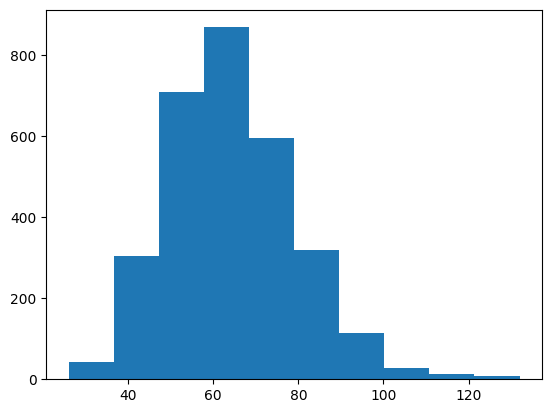

In [119]:
plt.hist(ak.count(hgg.GenPart.eta, axis=1))

In [155]:
hgg.GenPart.statusFlags[1][36]

28738

In [136]:
hgg.GenPart.statusFlags.__doc__

'gen status flags stored bitwise, bits are: 0 : isPrompt, 1 : isDecayedLeptonHadron, 2 : isTauDecayProduct, 3 : isPromptTauDecayProduct, 4 : isDirectTauDecayProduct, 5 : isDirectPromptTauDecayProduct, 6 : isDirectHadronDecayProduct, 7 : isHardProcess, 8 : fromHardProcess, 9 : isHardProcessTauDecayProduct, 10 : isDirectHardProcessTauDecayProduct, 11 : fromHardProcessBeforeFSR, 12 : isFirstCopy, 13 : isLastCopy, 14 : isLastCopyBeforeFSR, '

In [141]:
flags = ['isPrompt', 'isDecayedLeptonHadron', 'isTauDecayProduct', 'isPromptTauDecayProduct', 
         'isDirectTauDecayProduct', 'isDirectPromptTauDecayProduct', 'isDirectHadronDecayProduct', 'isHardProcess', 'fromHardProcess', 'isHardProcessTauDecayProduct', 
         'isDirectHardProcessTauDecayProduct', 'fromHardProcessBeforeFSR', 'isFirstCopy', 'isLastCopy', 'isLastCopyBeforeFSR']

In [140]:
hgg.GenPart[1][0].hasFlags(['isPromptTauDecayProduct'])

False

In [143]:
hasFlags = []
for i in flags:
    hasFlags.append(hgg.GenPart[1][0].hasFlags([i]))

In [144]:
hasFlags

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False]

In [149]:
(2**0) + (2**7) + (2**8) + (2**11)

2433

In [146]:
1 + 256 + 128 + 2048

2433

In [148]:
2**11

2048